# What makes a good In Flight Check in?


Run this code in your anaconda command prompt before running this code: `conda install -c conda-forge imbalanced-learn `

In [1]:
#import our basic data manipulation modules
import pandas as pd
import numpy as np
import scipy

#import our basic visualization modules
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#turn off warnings for sns depreciated versions- this is the best
import warnings
warnings.filterwarnings('ignore')

#import modules that describe distributions
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew

In [2]:
df = pd.read_csv("Dunder Mifflin Fundraising.csv")
df.head()

,Lookup,Hour,Days since last checkin,Check Ins,Contacts Created,Images Uploaded,Notes Written,Checkin_w_images,Checkin_w_Contact,Checkin_w_Note,...,Past 1-3 avg,Past 3-6 avg,Change in past week,Running average,last week change from running,Percentile of Running,Percentile of Past 1-3,Percentile of Past 3-6,Percentile of Past Week Change,target
0,30207-5-3-2017,10,30,1,2,1,0,1,1,0,...,0.000000,0.000000,0.000000,0.0,0.00000,0.000,0.00,0.000,0.000,0
1,30207-5-6-2017,16,3,1,0,3,0,1,0,0,...,0.000000,0.000000,0.000000,0.0,0.00000,0.000,0.00,0.000,0.000,0
2,30207-5-7-2017,10,1,0,0,0,1,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.00000,0.000,0.00,0.000,0.000,0
3,30207-5-7-2018,11,30,1,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.00000,0.000,0.00,0.000,0.000,0
4,30207-5-15-2018,20,8,1,0,0,0,0,0,0,...,1078.333333,881.333333,0.223525,515.5,1.09182,0.307,0.42,0.236,0.841,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 36 columns):
Lookup                            1914 non-null object
Hour                              1914 non-null int64
Days since last checkin           1914 non-null int64
Check Ins                         1914 non-null int64
Contacts Created                  1914 non-null int64
Images Uploaded                   1914 non-null int64
Notes Written                     1914 non-null int64
Checkin_w_images                  1914 non-null int64
Checkin_w_Contact                 1914 non-null int64
Checkin_w_Note                    1914 non-null int64
Checkin_w_I_C                     1914 non-null int64
Checkin_w_C_N                     1914 non-null int64
Checkin_w_I_N                     1914 non-null int64
Checkin_w_All                     1914 non-null int64
Property Type                     1914 non-null object
RegionName                        1914 non-null object
PopulationRank            

In [4]:
df = df.drop(['LocProvince','Market','RegionName'],axis=1)
df = df.drop(['PopulationRank','LocRegion','Property Type'],axis=1)
df = df.drop(['Campaign Day Funds','day of month'],axis=1)
#df[['Hour','PopulationRank','FundraisingYear','day of week']] = df[['Hour','PopulationRank','FundraisingYear','day of week']].astype('category')
df[['Hour','FundraisingYear','day of week']] = df[['Hour','FundraisingYear','day of week']].astype('category')

In [5]:
df = pd.get_dummies(data=df,
                    columns=['Hour','FundraisingYear','day of week'])
                    #columns=['Hour','Property Type','PopulationRank','LocRegion','FundraisingYear','day of week'])

In [6]:
#Create a list that displays only numeric variables
numeric_var=df.select_dtypes(include=[np.number]).columns
#Here we set up our correlation matrix for numeric variables
correlation=df[numeric_var].corr()
#Pull the max (whether positive or negative) correlation of each variable to another variable
aux=(abs(correlation)-np.identity(correlation.shape[0])).max()

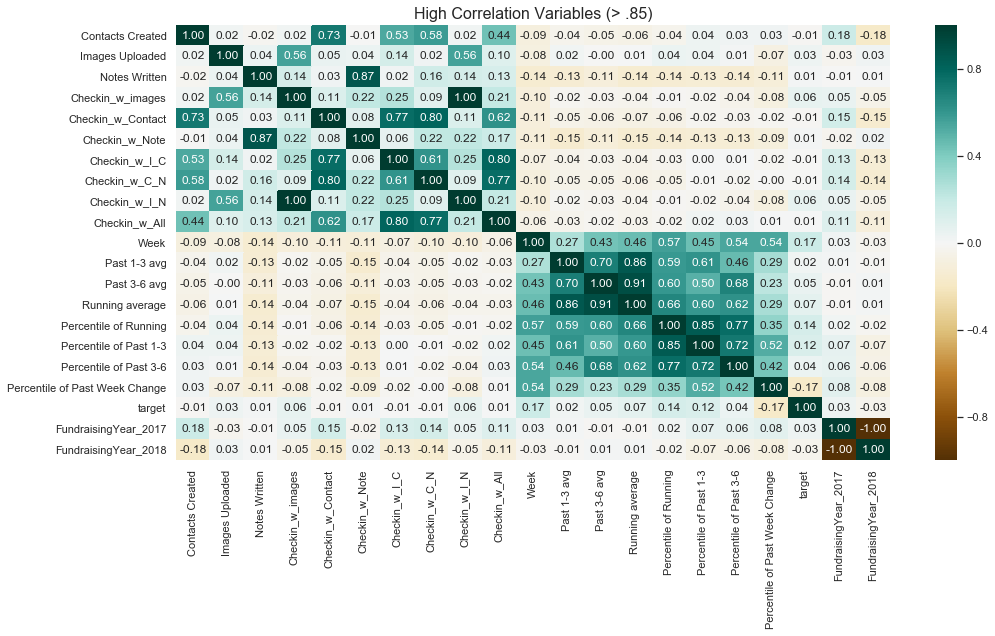

In [7]:
#Throw out any variables that don't have at least .7 correlation with something else or isn't Target
selected_feats=aux[(aux>0.50)| ((aux>0.215207) & (aux<0.215209))].index
sns.set()
fig, ax = plt.subplots(figsize=(16,8))
#make the plot have numbers, a legend and pretty colors
sns.heatmap(correlation.loc[selected_feats,selected_feats], annot=True,fmt='.2f',ax=ax,cmap="BrBG",center=0)
plt.title('High Correlation Variables (> .85)',fontsize=16)
#show the plot
plt.show()


In [8]:
correlation = df.corr()
correlation = correlation['target'].sort_values(ascending=False)
correlation

target                            1.000000
last week change from running     0.215208
Week                              0.174254
Percentile of Running             0.138578
Percentile of Past 1-3            0.118960
day of week_5                     0.106826
day of week_4                     0.102265
Running average                   0.074316
Check Ins                         0.066110
Checkin_w_images                  0.058827
Checkin_w_I_N                     0.058827
Hour_12                           0.054629
Past 3-6 avg                      0.051200
Hour_14                           0.043149
Percentile of Past 3-6            0.041779
Hour_1                            0.039795
Hour_4                            0.039795
Images Uploaded                   0.034396
FundraisingYear_2017              0.033765
Hour_7                            0.024879
Past 1-3 avg                      0.017266
Hour_13                           0.014634
Hour_19                           0.012330
Notes Writt

In [9]:
#df = df.drop(['Checkin_w_I_N','LocRegion_BC','LocRegion_CWI','LocRegion_Regional','FundraisingYear_2017','Week'],axis=1)
df = df.drop(['Checkin_w_I_N','FundraisingYear_2017','Week'],axis=1)

In [10]:
df.describe()

,Days since last checkin,Check Ins,Contacts Created,Images Uploaded,Notes Written,Checkin_w_images,Checkin_w_Contact,Checkin_w_Note,Checkin_w_I_C,Checkin_w_C_N,...,Hour_22,Hour_23,FundraisingYear_2018,day of week_1,day of week_2,day of week_3,day of week_4,day of week_5,day of week_6,day of week_7
count,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,...,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000
mean,16.061129,0.955590,0.122780,1.791014,0.602403,0.448798,0.072100,0.560084,0.042842,0.046499,...,0.004180,0.000522,0.513584,0.025601,0.140543,0.213166,0.202194,0.182863,0.157262,0.078370
std,12.030755,0.312842,0.474188,2.999251,0.549879,0.531045,0.270573,0.531098,0.215071,0.222683,...,0.064532,0.022858,0.499946,0.157983,0.347641,0.409651,0.401741,0.386655,0.364143,0.268823
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.000000,3.000000,7.000000,39.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Modeling

In [11]:
#Import the models we will be using
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler

#Bring in our crossvalidations
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, KFold, learning_curve, StratifiedKFold, StratifiedShuffleSplit

#Import the modules we will use to score our models
from sklearn.metrics import confusion_matrix, f1_score, make_scorer, accuracy_score, mean_squared_error, log_loss, roc_auc_score, average_precision_score, precision_score
import itertools
from imblearn.over_sampling import SMOTENC,SMOTE,ADASYN
from collections import Counter

In [12]:
#Retain our id fields
Id = df['Lookup']
#Create the two new data frames
train_y = pd.DataFrame()
train_x = pd.DataFrame()
#save our Target as our y variable
train_y['target'] = df['target']
train_x = df.drop(['target','Lookup'],axis=1)

In [13]:
#perform the train & test split
X1_train, X_test, y1_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=10, stratify=train_y)

### *Oversampling through synthetic observation creation*

In [14]:
print('Original dataset shape %s' % Counter(y1_train))
print(X1_train.shape)
print(y1_train.shape)

Original dataset shape Counter({'target': 1})
(1531, 50)
(1531, 1)


In [15]:
sm = ADASYN(random_state=42,n_jobs=-1)
res_x, res_y = sm.fit_resample(X1_train, y1_train)
y_train = pd.DataFrame(res_y)
X_train = pd.DataFrame(res_x)

In [16]:
print('Original dataset shape %s' % Counter(res_y))
labels = np.unique(y_train)
print(labels)

Original dataset shape Counter({0: 1151, 1: 1148})
[0 1]


### *May want to do some dimensionality reduction?*

- https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

- https://scikit-learn.org/stable/modules/feature_selection.html

- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition

- https://scikit-learn.org/0.19/auto_examples/plot_compare_reduction.html

In [17]:
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
# apply same transformation to test data
X_test = scaler.transform(X_test)  

In [18]:
F1_scorer = make_scorer(f1_score, greater_is_better=True, average='macro')
tpr = make_scorer(average_precision_score)
pre = make_scorer(precision_score)
scoring = pre

In [19]:
#Create a variable that will show us the best parameters, with what accuracy it predicts and what the F1 score is for its predictions
def show_me_the_money(model,test_y,test_x,train_y=y_train,train_x=X_train):
    #print("Best Params: {}".format(model.best_params_))
    print('Scoring Metrics')
    train_predictions = model.predict(train_x)
    test_predictions = model.predict(test_x)
    print('*******************************************************')
    print("Train Accuracy: {}".format(accuracy_score(y_train, train_predictions)))
    print("Test Accuracy: {}".format(accuracy_score(y_test, test_predictions)))

    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    
    train_auc = roc_auc_score(y_train, train_predictions)
    test_auc = roc_auc_score(y_test, test_predictions)
    
    train_tpr = roc_auc_score(y_train, train_predictions)
    test_tpr = roc_auc_score(y_test, test_predictions)
    
    print('*******************************************************')
    print("Train MSE: {}".format(train_mse))
    print("Test MSE: {}".format(test_mse))
    print('*******************************************************')
    print("Train ROC AUC: {}".format(train_auc))
    print("Test ROC AUC: {}".format(test_auc))
    print('*******************************************************')
    print("Train F1 Score: {}".format(f1_score(y_train, train_predictions,average='macro')))
    print("Test F1 Score: {}".format(f1_score(test_y, model.predict(test_x),average='macro')))
    print('*******************************************************')
    print("Train ROC AUC: {}".format(train_tpr))
    print("Test ROC AUC: {}".format(test_tpr))
    print('*******************************************************')
    

In [20]:
#generalized confusion matrix plot
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize = (8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 20)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 16)
    plt.xlabel('Predicted label', size = 16)

    
#specific matrix for our needs    
def show_con_matrix(model,test_y,test_x,title):
    pred_matrix = confusion_matrix(test_y, model.predict(test_x))
    plot_confusion_matrix(pred_matrix, classes = ['Less effective', 'More effective'],
                      title = title)
    plt.show

In [21]:
## source: http://scikit-learn.org/0.15/auto_examples/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring,shuffle=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## Support Vector Classification

In [22]:
#set up model, allow it to use all cores
svc = svm.SVC(class_weight='balanced')

#set hyperparameters
param_grid = {"C": [.25,.05,1,1.5,2],
              "gamma":['auto','scale']}

#set up the grid search, with 5 crossvalidations and scoring based on our F1_scorer that we created
svc_gridsearch = GridSearchCV(svc,param_grid=param_grid,scoring=scoring,cv=5)

#fit model
svc_gridsearch.fit(X_train,y_train)

#save model
optimised_svc = svc_gridsearch.best_estimator_
optimised_svc

SVC(C=2, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
#see how it did
show_me_the_money(optimised_svc,y_test,X_test)

Scoring Metrics
*******************************************************
Train Accuracy: 0.9273597216180949
Test Accuracy: 0.793733681462141
*******************************************************
Train MSE: 0.07264027838190518
Test MSE: 0.206266318537859
*******************************************************
Train ROC AUC: 0.9274169257455266
Test ROC AUC: 0.7394005847953217
*******************************************************
Train F1 Score: 0.9272274880932682
Test F1 Score: 0.7318426346902058
*******************************************************
Train ROC AUC: 0.9274169257455266
Test ROC AUC: 0.7394005847953217
*******************************************************


<module 'matplotlib.pyplot' from 'C:\\Users\\zgeorge\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

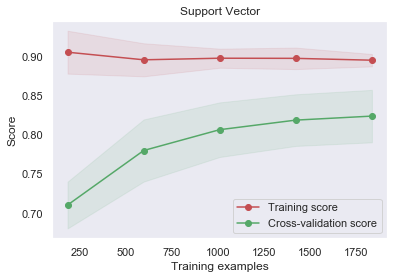

In [24]:
plot_learning_curve(optimised_svc,'Support Vector',X=X_train,y=y_train,cv=5,n_jobs=-1)

Confusion matrix, without normalization


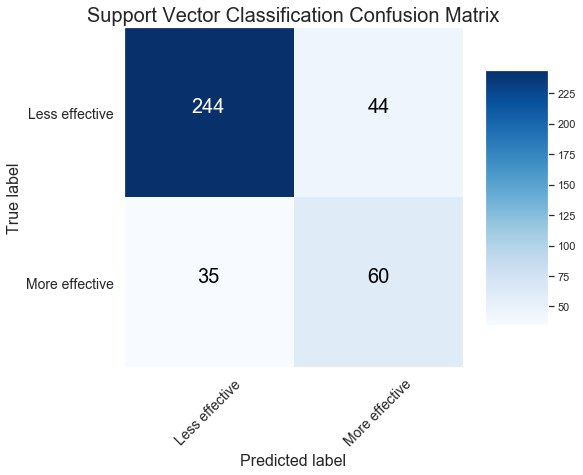

In [25]:
#Show confusion matrix
show_con_matrix(optimised_svc,y_test, X_test,'Support Vector Classification Confusion Matrix')

### Naive Bayes

In [26]:
#set up model
gnb = GaussianNB()

#fit model
gnb.fit(X_train,y_train)
#because there aren't hyperparameters, we can't use our fancy defined function, so we'll pull the results manually
print("Test Accuracy: {}".format(accuracy_score(y_test, gnb.predict(X_test))))
print("F1 Score: {}".format(f1_score(y_test, gnb.predict(X_test),average='macro')))

nb_train_predictions = gnb.predict(X_train)
nb_test_predictions = gnb.predict(X_test)

nb_train_mse = mean_squared_error(y_train, nb_train_predictions)
nb_test_mse = mean_squared_error(y_test, nb_test_predictions)
    
nb_train_auc = roc_auc_score(y_train, nb_train_predictions)
nb_test_auc = roc_auc_score(y_test, nb_test_predictions)

print("Train MSE: {}".format(nb_train_mse))
print("Test MSE: {}".format(nb_test_mse))
    
print("Train ROC AUC: {}".format(nb_train_auc))
print("Test ROC AUC: {}".format(nb_test_auc))

Test Accuracy: 0.7571801566579635
F1 Score: 0.46967914836596436
Train MSE: 0.4902131361461505
Test MSE: 0.24281984334203655
Train ROC AUC: 0.5091633695286935
Test ROC AUC: 0.5175804093567251


<module 'matplotlib.pyplot' from 'C:\\Users\\zgeorge\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

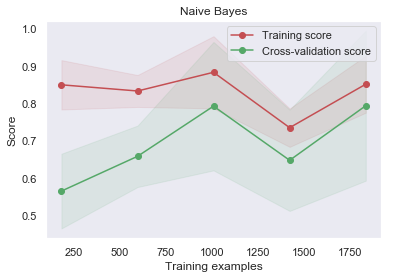

In [27]:
#High is Better
plot_learning_curve(gnb,'Naive Bayes',X_train,y_train,cv=5,n_jobs=-1)

Confusion matrix, without normalization


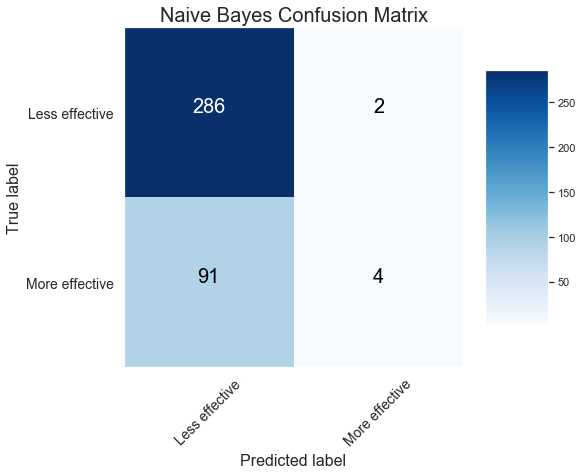

In [28]:
#Show confusion matrix
show_con_matrix(gnb,y_test, X_test,'Naive Bayes Confusion Matrix')

### Stochiastic Gradient Descent

In [29]:
#set up model, allow it to use all cores
sgd = SGDClassifier(n_jobs=-1,class_weight='balanced')

#set hyperparameters
param_grid = {"loss": ['log', 'modified_huber'],
             "l1_ratio" :[0, .001, .04, .5, .69, .8, .9,1],
             "penalty":['none', 'l2', 'l1', 'elasticnet'],
             "early_stopping":[False,True]}

#set up the grid search, with 5 crossvalidations and scoring based on our F1_scorer that we created
sgd_gridsearch = GridSearchCV(sgd,param_grid=param_grid,scoring=scoring,cv=5)

#fit model
sgd_gridsearch.fit(X_train,y_train)

#save model
optimised_sgd = sgd_gridsearch.best_estimator_
optimised_sgd

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=1, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=-1, penalty='l1',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [30]:
#see how it did
show_me_the_money(optimised_sgd,y_test,X_test)

Scoring Metrics
*******************************************************
Train Accuracy: 0.7442366246193998
Test Accuracy: 0.7232375979112271
*******************************************************
Train MSE: 0.2557633753806003
Test MSE: 0.27676240208877284
*******************************************************
Train ROC AUC: 0.7442498115560775
Test ROC AUC: 0.7242690058479532
*******************************************************
Train F1 Score: 0.7442152826133026
Test F1 Score: 0.6812543181960933
*******************************************************
Train ROC AUC: 0.7442498115560775
Test ROC AUC: 0.7242690058479532
*******************************************************


<module 'matplotlib.pyplot' from 'C:\\Users\\zgeorge\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

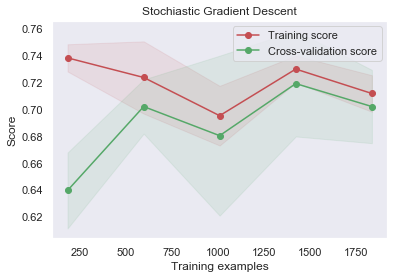

In [31]:
#High is Better
plot_learning_curve(optimised_sgd,'Stochiastic Gradient Descent',X_train,y_train,cv=5,n_jobs=-1)

Confusion matrix, without normalization


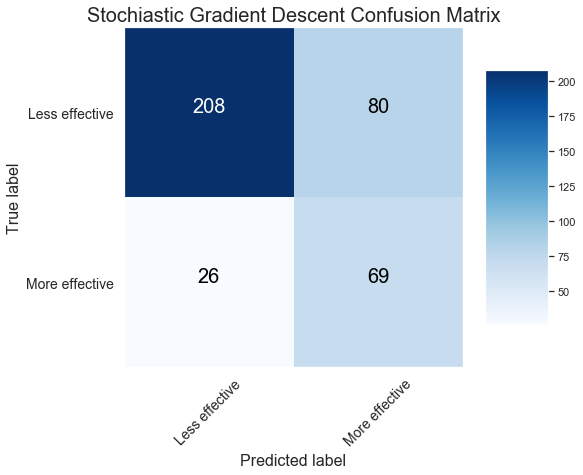

In [32]:
#Show confusion matrix
show_con_matrix(optimised_sgd,y_test, X_test,'Stochiastic Gradient Descent Confusion Matrix')

### K-Nearest Neighbors

In [33]:
#set up model, allow it to use all cores
knk = KNeighborsClassifier(n_jobs = -1)

#set hyperparameters
param_grid = {"n_neighbors": [3,4, 5,6, 7,],
             "weights": ['uniform','distance'],
              "p": [1,2,3]}

#set up the grid search, with 5 crossvalidations and scoring based on our F1_scorer that we created
knk_gridsearch = GridSearchCV(knk,param_grid=param_grid,scoring=scoring,cv=5)

#fit model
knk_gridsearch.fit(X_train,y_train)

#save model
optimised_knk = knk_gridsearch.best_estimator_
optimised_knk

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=1,
           weights='uniform')

In [34]:
#see how it did
show_me_the_money(optimised_knk,y_test,X_test)

Scoring Metrics
*******************************************************
Train Accuracy: 0.9386689865158765
Test Accuracy: 0.7702349869451697
*******************************************************
Train MSE: 0.06133101348412353
Test MSE: 0.2297650130548303
*******************************************************
Train ROC AUC: 0.9386558272309793
Test ROC AUC: 0.6602887426900584
*******************************************************
Train F1 Score: 0.9386611413082044
Test F1 Score: 0.6701119724375538
*******************************************************
Train ROC AUC: 0.9386558272309793
Test ROC AUC: 0.6602887426900584
*******************************************************


<module 'matplotlib.pyplot' from 'C:\\Users\\zgeorge\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

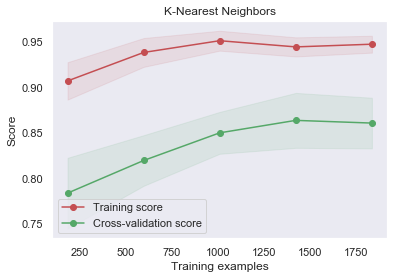

In [35]:
#High is Better
plot_learning_curve(optimised_knk,'K-Nearest Neighbors',X_train,y_train,cv=5,n_jobs=-1)

*For high variance:*

- Get more training data
- Try a smaller set of features
- Try a less complex model
- Add regularization - Prevents it from fitting

Confusion matrix, without normalization


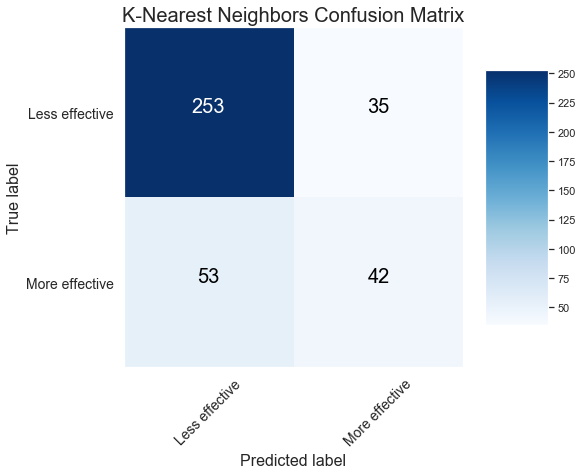

In [36]:
#Show confusion matrix
show_con_matrix(optimised_knk,y_test, X_test,'K-Nearest Neighbors Confusion Matrix')

### Random Forrest Classifiers

In [37]:
#set up model, allow it to use all cores
rfc = RandomForestClassifier(random_state=42, n_jobs = -1)

#set hyperparameters
param_grid = {"n_estimators": [ 105, 110, 115, 120],
             "min_samples_leaf":[1,2,3,4],
             "class_weight":["balanced", "balanced_subsample"]}


#set up the grid search, with 5 crossvalidations and scoring based on our F1_scorer that we created
rfc_gridsearch = GridSearchCV(rfc,param_grid=param_grid,scoring=scoring,cv=5,n_jobs=-1)

#fit model
rfc_gridsearch.fit(X_train,y_train)

#save model
optimised_rfc = rfc_gridsearch.best_estimator_

In [38]:
#see how it did
show_me_the_money(optimised_rfc,y_test,X_test)

Scoring Metrics
*******************************************************
Train Accuracy: 1.0
Test Accuracy: 0.8381201044386423
*******************************************************
Train MSE: 0.0
Test MSE: 0.1618798955613577
*******************************************************
Train ROC AUC: 1.0
Test ROC AUC: 0.7653874269005848
*******************************************************
Train F1 Score: 1.0
Test F1 Score: 0.7748767538869928
*******************************************************
Train ROC AUC: 1.0
Test ROC AUC: 0.7653874269005848
*******************************************************


<module 'matplotlib.pyplot' from 'C:\\Users\\zgeorge\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

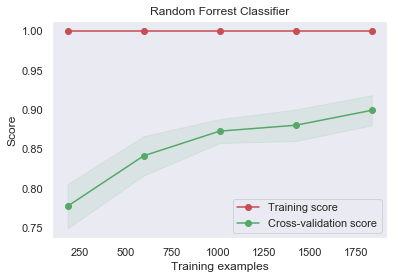

In [39]:
#High is Better
plot_learning_curve(optimised_rfc,'Random Forrest Classifier',X_train,y_train,cv=5,n_jobs=-1)

*For high variance:*

- Get more training data
- Try a smaller set of features
- Try a less complex model
- Add regularization - Prevents it from fitting

Confusion matrix, without normalization


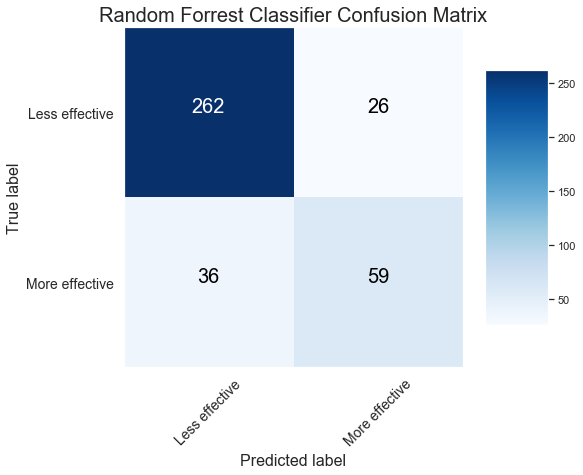

In [40]:
#Show confusion matrix
show_con_matrix(optimised_rfc,y_test, X_test,'Random Forrest Classifier Confusion Matrix')

Text(0.5, 1.0, 'Feature Importances')

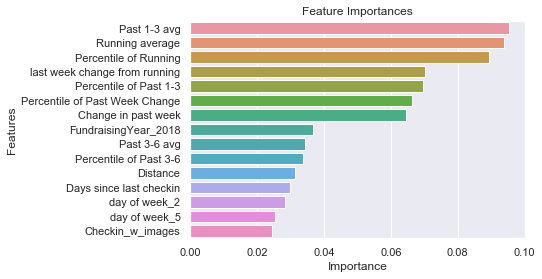

In [41]:
#Retrieve feature importances and insert them into a dataframe
imp_feat_rfc = sorted(list(zip(train_x.columns, optimised_rfc.feature_importances_)), key=lambda x: x[1], reverse=True)
#Create a plot of the top ten importances
importance_rfc = pd.DataFrame(imp_feat_rfc,columns=['Features','Importance'])
sns.barplot('Importance','Features',data=importance_rfc.head(15))
plt.title('Feature Importances')

### Deep Learning
https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification

In [42]:
#set up model, allow it to use all cores
dl = MLPClassifier(random_state=1,early_stopping=True)

#set hyperparameters
param_grid = {"solver": ['lbfgs', 'sgd', 'adam'],
             "alpha": [1e-5,1e-4,1e-3,1e-2,1,10]}


#set up the grid search, with 5 crossvalidations and scoring based on our F1_scorer that we created
dl_gridsearch = GridSearchCV(dl,param_grid=param_grid,scoring=scoring,cv=5)

#fit model
dl_gridsearch.fit(X_train,y_train)

#save model
optimised_dl = dl_gridsearch.best_estimator_

In [43]:
#see how it did
show_me_the_money(optimised_dl,y_test,X_test)

Scoring Metrics
*******************************************************
Train Accuracy: 0.9995650282731623
Test Accuracy: 0.7676240208877284
*******************************************************
Train MSE: 0.00043497172683775554
Test MSE: 0.23237597911227154
*******************************************************
Train ROC AUC: 0.9995655951346656
Test ROC AUC: 0.676187865497076
*******************************************************
Train F1 Score: 0.9995650279439747
Test F1 Score: 0.680501270046584
*******************************************************
Train ROC AUC: 0.9995655951346656
Test ROC AUC: 0.676187865497076
*******************************************************


<module 'matplotlib.pyplot' from 'C:\\Users\\zgeorge\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

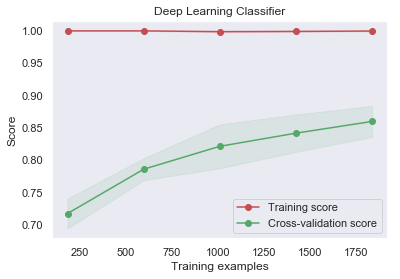

In [44]:
#High is Better
plot_learning_curve(optimised_dl,'Deep Learning Classifier',X_train,y_train,cv=5,n_jobs=-1)

*For high variance:*

- Get more training data
- Try a smaller set of features
- Try a less complex model
- Add regularization - Prevents it from fitting

Confusion matrix, without normalization


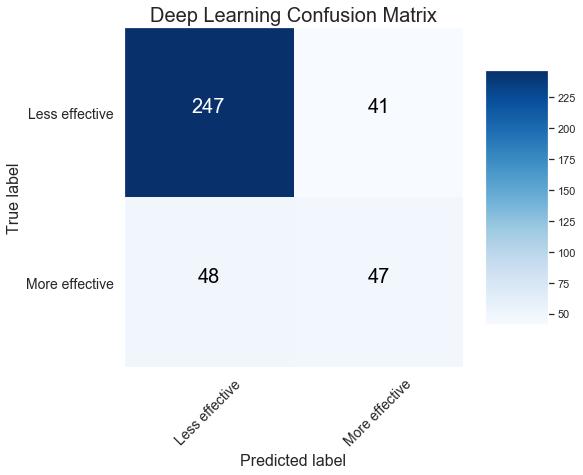

In [45]:
#Show confusion matrix
show_con_matrix(optimised_dl,y_test, X_test,'Deep Learning Confusion Matrix')

## Gradient Boosting
https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

In [46]:
#set up model, allow it to use all cores
gbc = GradientBoostingClassifier()

#set hyperparameters
param_grid = {"learning_rate": [.0001,.001,.01,.05,.9],
             "n_estimators": [50,100,150],
             "max_depth":[2,3,4,5]}


#set up the grid search, with 5 crossvalidations and scoring based on our F1_scorer that we created
gbc_gridsearch = GridSearchCV(gbc,param_grid=param_grid,scoring=scoring,cv=5)

#fit model
gbc_gridsearch.fit(X_train,y_train)

#save model
optimised_gbc = gbc_gridsearch.best_estimator_
optimised_gbc

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=150,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [47]:
#see how it did
show_me_the_money(optimised_gbc,y_test,X_test)

Scoring Metrics
*******************************************************
Train Accuracy: 0.9569377990430622
Test Accuracy: 0.8407310704960835
*******************************************************
Train MSE: 0.0430622009569378
Test MSE: 0.15926892950391644
*******************************************************
Train ROC AUC: 0.956929211683826
Test ROC AUC: 0.767123538011696
*******************************************************
Train F1 Score: 0.9569351591282398
Test F1 Score: 0.7776498244077927
*******************************************************
Train ROC AUC: 0.956929211683826
Test ROC AUC: 0.767123538011696
*******************************************************


<module 'matplotlib.pyplot' from 'C:\\Users\\zgeorge\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

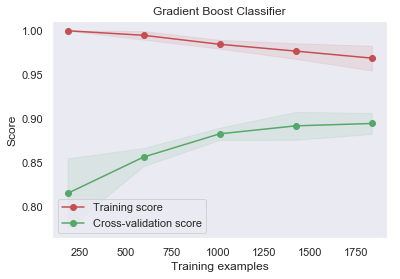

In [48]:
#High is Better
plot_learning_curve(optimised_gbc,'Gradient Boost Classifier',X_train,y_train,cv=5,n_jobs=-1)

Confusion matrix, without normalization


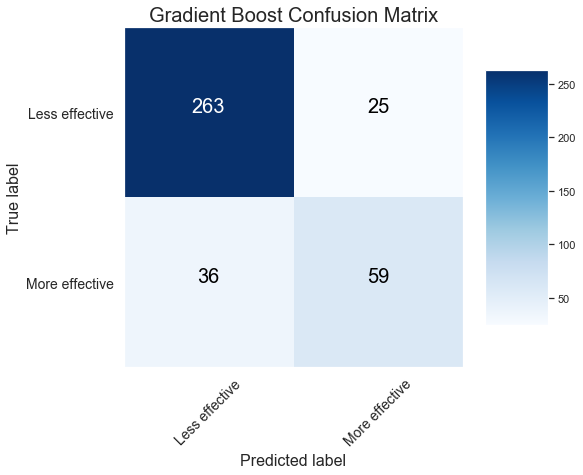

In [49]:
#Show confusion matrix
show_con_matrix(optimised_gbc,y_test, X_test,'Gradient Boost Confusion Matrix')

Text(0.5, 1.0, 'Feature Importances')

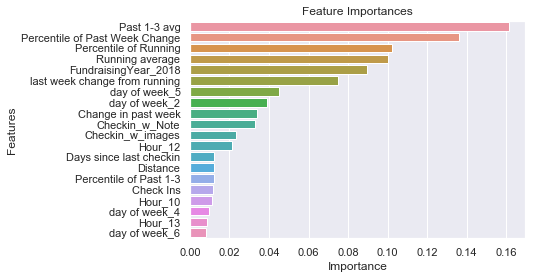

In [50]:
#Retrieve feature importances and insert them into a dataframe
imp_feat_gbc = sorted(list(zip(train_x.columns, optimised_gbc.feature_importances_)), key=lambda x: x[1], reverse=True)
#Create a plot of the top ten importances
importance_gbc = pd.DataFrame(imp_feat_gbc,columns=['Features','Importance'])
sns.barplot('Importance','Features',data=importance_gbc.head(20))
plt.title('Feature Importances')

## XGBoost

In [51]:
#X_test_xgb = X_test.as_matrix()
#X_train_xgb = X_train.as_matrix()

#set up model, allow it to use all cores
xgb = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

#set hyperparameters
param_grid = { 'max_depth':range(3,10,2),
             'min_child_weight':[6,8,10,12]}


#set up the grid search, with 5 crossvalidations and scoring based on our F1_scorer that we created
xgb_gridsearch = GridSearchCV(xgb,param_grid=param_grid,scoring=scoring,cv=5,n_jobs=-1)

#fit model
xgb_gridsearch.fit(X_train,y_train)

#save model
optimised_xgb = xgb_gridsearch.best_estimator_
optimised_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=10, missing=None, n_estimators=140,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [52]:
#see how it did
show_me_the_money(optimised_xgb,test_y=y_test,test_x=X_test)

Scoring Metrics
*******************************************************
Train Accuracy: 0.943018703784254
Test Accuracy: 0.8433420365535248
*******************************************************
Train MSE: 0.05698129621574598
Test MSE: 0.1566579634464752
*******************************************************
Train ROC AUC: 0.9430078223147876
Test ROC AUC: 0.7653326023391812
*******************************************************
Train F1 Score: 0.9430134853584267
Test F1 Score: 0.7786979969183359
*******************************************************
Train ROC AUC: 0.9430078223147876
Test ROC AUC: 0.7653326023391812
*******************************************************


<module 'matplotlib.pyplot' from 'C:\\Users\\zgeorge\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

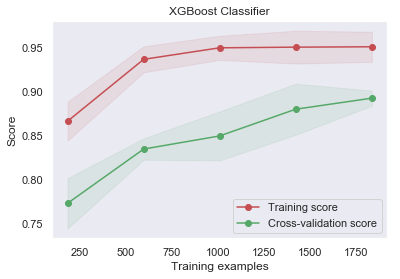

In [53]:
#High is Better
plot_learning_curve(optimised_xgb,'XGBoost Classifier',X_train,y_train,cv=5,n_jobs=-1)

Confusion matrix, without normalization


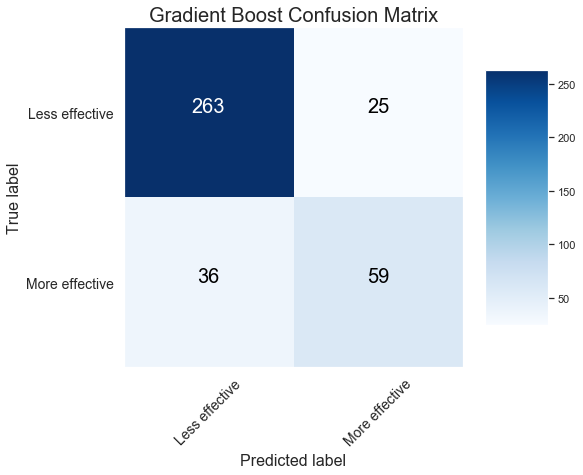

In [54]:
#Show confusion matrix
show_con_matrix(optimised_gbc,y_test, X_test,'Gradient Boost Confusion Matrix')

Text(0.5, 1.0, 'Feature Importances')

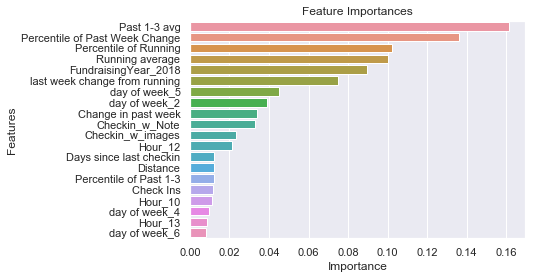

In [55]:
#Retrieve feature importances and insert them into a dataframe
imp_feat_gbc = sorted(list(zip(train_x.columns, optimised_gbc.feature_importances_)), key=lambda x: x[1], reverse=True)
#Create a plot of the top ten importances
importance_gbc = pd.DataFrame(imp_feat_gbc,columns=['Features','Importance'])
sns.barplot('Importance','Features',data=importance_gbc.head(20))
plt.title('Feature Importances')